In [ ]:
##Caminho do data set

## https://raw.githubusercontent.com/sandeco/CanalSandeco/master/covid-19/covid_19_data.csv

In [ ]:
# Bibliotecas para manipular os dados
import pandas as pd
import numpy as np

# Biblioteca Prophet do Facebook para predição dos dados
from fbprophet import Prophet

**Lendo o data set, um arquivo em csv.**

In [ ]:
covid = pd.read_csv('https://raw.githubusercontent.com/sandeco/CanalSandeco/master/covid-19/covid_19_data.csv')

In [ ]:
covid.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
10353,10354,03/30/2020,Wyoming,US,2020-03-30 22:58:55,94.0,0.0,0.0
10354,10355,03/30/2020,Xinjiang,Mainland China,2020-03-30 22:58:55,76.0,3.0,73.0
10355,10356,03/30/2020,Yukon,Canada,2020-03-30 22:58:55,4.0,0.0,0.0
10356,10357,03/30/2020,Yunnan,Mainland China,2020-03-30 22:58:55,180.0,2.0,172.0
10357,10358,03/30/2020,Zhejiang,Mainland China,2020-03-30 22:58:55,1255.0,1.0,1225.0


**Renomeando as colunas ObservartionDate e Country/Region**

In [ ]:
covid.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'},inplace=True)

In [ ]:
covid.head(2)

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0


**Criando uma variável mortes e agrupando por data e somando por mortes. Por fim indexando**

In [ ]:
mortes = covid.groupby('Date').sum()['Deaths'].reset_index()
mortes.tail()

,Date,Deaths
64,03/26/2020,23970.0
65,03/27/2020,27198.0
66,03/28/2020,30652.0
67,03/29/2020,33925.0
68,03/30/2020,37582.0


**Plotando as mortes**

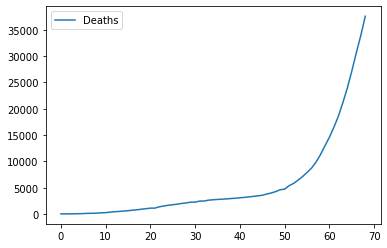

In [ ]:
mortes.plot()

**Formato das colunas de dados do Prophet, ds e y**

A coluna ds deve ter o formato esperado pelo pandas, idealmente AAAA-MM-DD, para AAAA-MM-DD HH::MM:SS para timestamp.

A coluna y deve ser númerica e representa a medida que desejamos prever. 



**Renomeando as colunas date e Deaths, para ds e y.**

In [ ]:
mortes.columns = ['ds', 'y']

In [ ]:
mortes.head()

,ds,y
0,01/22/2020,17.0
1,01/23/2020,18.0
2,01/24/2020,26.0
3,01/25/2020,42.0
4,01/26/2020,56.0


**Transformando a coluna ds no formato timestamp**

In [ ]:
mortes['ds'] = pd.to_datetime(mortes['ds'])

In [ ]:
mortes.head()

,ds,y
0,2020-01-22,17.0
1,2020-01-23,18.0
2,2020-01-24,26.0
3,2020-01-25,42.0
4,2020-01-26,56.0


**Previsão de mortes da covid-19 no mundo, utilizando o Prophet.**

**DADOS CONTENDO SÉRIES TEMPORAIS.**
Em séries temporais a tendência muda o tempo todo, por isso é impossível ter certeza se faremos a coisa mais razoável possíovel e assumimos que o futuro sofrerá mudanças de tendência.
Nesse caso, assumiremos um intervalo de confiança de 95%, ou seja admitimos um erro de 5%. 

**Instanciando o Prophet e informando o intervalo de 95%**

In [ ]:
# Variável FB intanciando o Prophet
fb = Prophet(interval_width=0.95)

**Treinando meu modelo. Minha variável fb que já contém o Prophet instanciado, chama o método fit e passo como parâmetro minha variável mortes que já contém as colunas de dados ds e y.**

In [ ]:
fb.fit(mortes)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Criando um futuro utilizando o Prophet.**

In [ ]:
# Variável onde informo os dias que quero calcular
dias = 10

In [ ]:
# Crio uma variável futuro
# Recebe a variável fb e chamo o método make_future_dataframe
# Para esse método informo um período para essa previsão de futuro
# Para ativar a sazonalidade diária, após infomar o período basta dar uma vírgula e informar daily_seasonality=True
# futuro = fb.make_future_dataframe(periods=7, daily_seasonality=True)
futuro = fb.make_future_dataframe(periods=dias)
futuro.tail(dias)

,ds
69,2020-03-31
70,2020-04-01
71,2020-04-02
72,2020-04-03
73,2020-04-04
74,2020-04-05
75,2020-04-06
76,2020-04-07
77,2020-04-08
78,2020-04-09


**Fazendo uma previsão utilizando o método predict**

In [ ]:
# Crio uma variável futuro
# Recebe a variável fb que instanciei o Prophet
# Passo como parâmetro a minha variável futuro que contém os dados de futuro
previsao = fb.predict(futuro)

previsao.tail(dias)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
69,2020-03-31,34610.435643,32444.791906,36490.356453,34524.399893,34686.440822,-201.620197,-201.620197,-201.620197,-201.620197,-201.620197,-201.620197,0.0,0.0,0.0,34408.815446
70,2020-04-01,36568.744563,34409.320926,38366.193496,36339.911023,36776.163668,-179.745244,-179.745244,-179.745244,-179.745244,-179.745244,-179.745244,0.0,0.0,0.0,36388.999319
71,2020-04-02,38527.053482,36218.933310,40501.671829,38104.995936,38914.955572,-187.560276,-187.560276,-187.560276,-187.560276,-187.560276,-187.560276,0.0,0.0,0.0,38339.493206
72,2020-04-03,40485.362401,38367.690621,42339.870429,39818.674972,41087.184895,-86.602299,-86.602299,-86.602299,-86.602299,-86.602299,-86.602299,0.0,0.0,0.0,40398.760102
73,2020-04-04,42443.671321,40259.793199,44675.530741,41565.401903,43288.674107,54.700410,54.700410,54.700410,54.700410,54.700410,54.700410,0.0,0.0,0.0,42498.371730
74,2020-04-05,44401.980240,42198.818424,46878.888202,43257.609135,45536.046600,192.602260,192.602260,192.602260,192.602260,192.602260,192.602260,0.0,0.0,0.0,44594.582500
75,2020-04-06,46360.289159,44350.658163,49205.298879,44923.774817,47814.805265,408.225347,408.225347,408.225347,408.225347,408.225347,408.225347,0.0,0.0,0.0,46768.514506
76,2020-04-07,48318.598079,45367.233468,50686.946807,46542.158362,50053.213542,-201.620197,-201.620197,-201.620197,-201.620197,-201.620197,-201.620197,0.0,0.0,0.0,48116.977881
77,2020-04-08,50276.906998,47339.300525,52759.128274,48147.754700,52334.918439,-179.745244,-179.745244,-179.745244,-179.745244,-179.745244,-179.745244,0.0,0.0,0.0,50097.161754
78,2020-04-09,52235.215917,48920.060329,55182.630360,49712.084616,54589.492085,-187.560276,-187.560276,-187.560276,-187.560276,-187.560276,-187.560276,0.0,0.0,0.0,52047.655641


**Desses dados de previsão do futuro, eu preciso da data, previsão para baixo, previsão do meio e previsão para cima. Tenho o pico baixo, médio e alto.**

In [ ]:
previsao[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].tail(dias)

,ds,yhat_lower,yhat,yhat_upper
69,2020-03-31,32444.791906,34408.815446,36490.356453
70,2020-04-01,34409.320926,36388.999319,38366.193496
71,2020-04-02,36218.933310,38339.493206,40501.671829
72,2020-04-03,38367.690621,40398.760102,42339.870429
73,2020-04-04,40259.793199,42498.371730,44675.530741
74,2020-04-05,42198.818424,44594.582500,46878.888202
75,2020-04-06,44350.658163,46768.514506,49205.298879
76,2020-04-07,45367.233468,48116.977881,50686.946807
77,2020-04-08,47339.300525,50097.161754,52759.128274
78,2020-04-09,48920.060329,52047.655641,55182.630360


**Plotando a previsão**

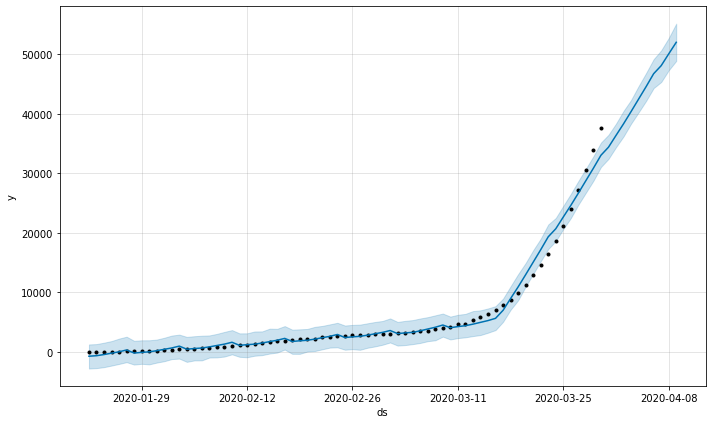

In [ ]:
results = fb.plot(previsao)